## Quantum Walk Tutorial


In [1]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
import matplotlib.pyplot as plt

<h3><center>Increment Gate</center></h3>

<img src="increment_gate.png" width="auto">

<h3><center>Decrement Gate</center></h3>

<img src="decrement_gate.png" width="auto">

<h3><center>One time step of a Hadamard Walk</center></h3>
<img src="1step.png" width="auto">


<h3><center>1D Quantum Walk Circuit</center></h3>
<img src="1d_circuit.png" width="600px">
<h3><center>2D Quantum Walk Circuit</center></h3>
<img src="2d_circuit.png" width="800px">

In [18]:
# 1D Graph
def increment_gate(circuit, qpos, qcoin):
    n = len(qpos)
    for i in range(n):
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        
def decrement_gate(circuit, qpos, qcoin):
    n = len(qpos)
    circuit.x(qcoin[0])
    for i in range(n):
        if i+1 < n: circuit.x(qpos[i+1:])
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        if i+1 < n: circuit.x(qpos[i+1:])
            
def step(circuit, qpos, qcoin):
    circuit.h(qcoin)
    circuit.barrier()
    increment_gate(circuit, qpos, qcoin)
    circuit.barrier()
    decrement_gate(circuit, qpos, qcoin)
    circuit.barrier()

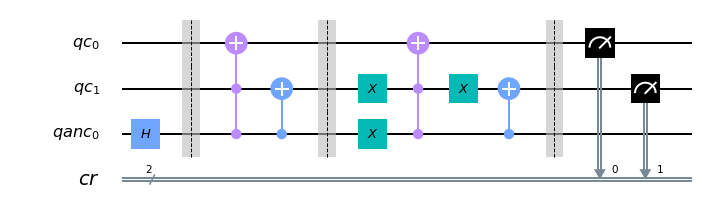

In [7]:
n=2

qpos = QuantumRegister(n,'qc')
qcoin = QuantumRegister(1,'qanc')
cpos = ClassicalRegister(n,'cr')
circuit = QuantumCircuit(qpos, qcoin, cpos)
step(circuit, qpos, qcoin)
# # Map the quantum measurement to the classical bits
circuit.measure(qpos,cpos)

circuit.draw(output='mpl')

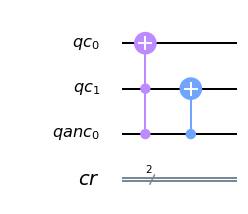

In [17]:
qpos = QuantumRegister(n,'qc')
qcoin = QuantumRegister(1,'qanc')
cpos = ClassicalRegister(n,'cr')

# Increment gate
circuit = QuantumCircuit(qpos, qcoin, cpos)
increment_gate(circuit, qpos, qcoin)
circuit.draw(output='mpl')

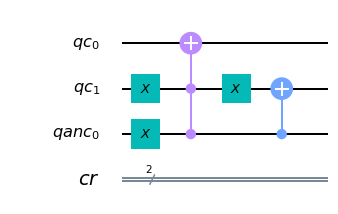

In [16]:
# Decrement gate
circuit = QuantumCircuit(qpos, qcoin, cpos)
decrement_gate(circuit, qpos, qcoin)
circuit.draw(output='mpl')